In [1]:
import pandas as pd 
import numpy as np 
import os 
import plotly.graph_objects as go 

import utils.DE_plotting_tools as plot_utils
import utils.flow_table_tools as flow_utils
import utils.color_function as cf 
import utils.plot_functions as pf 

In [2]:
import importlib 
importlib.reload(flow_utils)
importlib.reload(plot_utils)

<module 'utils.DE_plotting_tools' from '/data/jlu/Chaperone_Analysis/notebooks/utils/DE_plotting_tools.py'>

In [3]:
# Read data 
data = pd.read_csv('../files/OR_FACS/FACS_data_20240605.csv')

In [5]:
# Manually exclude experiments 
data = data[~data['exp_date'].isin(['05082022_Lu', '05112022_Lu', '05222022_Lu'])]
# data = data[data.Count == 10000]

#### Rtp1s, Gfy, Clgn Combination

In [53]:
samples_to_plot = ['RhopCI', 'Olfr1377', 'Olfr1377+Gfy','Olfr1377+Clgn','Olfr1377+R','Olfr1377+RG','Olfr1377+RC','Olfr1377+RGC']
plot_by = 'Normalized_GeoMean'
# plot_by = 'GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
   
# plot_df = plot_df[plot_df['exp_date'].isin(['06032023_Lu', '06212023_Lu', '06172023_Lu'])]
plot_df = plot_df[plot_df.Count >= 10000]


# Normalizing GeoMean 
plot_df = flow_utils.normalize_metric(plot_df, normalize_by='Olfr1377+R', normalize_metric='GeoMean', groupby_cols = ['exp_date', 'OR'])
# plot_df = plot_df.dropna(subset=[plot_by]) # drops nan values that doesn't have the normalize_by in the same exp_date

cmap = plot_utils.distinct_colors(samples_to_plot, category='my_Tab10')


fig = go.Figure()

for _sample in plot_df.Sample_name.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        # marker = dict(color = 'black')
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
   # Bar plot
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 5, color ='black'),
                        opacity = 0.7, 
                        showlegend=False 
                        ))
   
# Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1], [1,4], [4,7]], 
                                        test_type = 'ranksums', 
                                        select_datatype='box')   

# fig = plot_utils.add_p_value_annotation(fig, [[0,1], [1,2], [2,5]], 
#                                         test_type = 'ranksums', 
#                                         select_datatype='box')   
   
fig.update_layout(template='simple_white', 
                  yaxis_title = plot_by)
# draft_template = go.layout.Template()
# fig.update_layout(template=draft_template)
# fig.update_xaxes(showgrid=False, zeroline=True)
# fig.update_yaxes(showgrid=False, showline=True, zeroline=True)
fig.show()

# fig.write_html('../output/Chaperone_flow_image/bar_Olfr1377.html')

In [27]:
samples_to_plot = ['RhopCI', 'Olfr1377', 'Olfr1377+Gfy','Olfr1377+Clgn','Olfr1377+R','Olfr1377+RG','Olfr1377+RC','Olfr1377+RGC']
# plot_by = 'Normalized_GeoMean'
plot_by = 'GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
plot_df = plot_df[plot_df.Count >= 10000]
# plot_df = plot_df[(plot_df.OR == 1000) | (plot_df.Sample_name == 'RhopCI')]

# plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = ['Olfr1377+R','Olfr1377+RGC'])



# Normalizing GeoMean 
plot_df = flow_utils.normalize_metric(plot_df, normalize_by='Olfr1377+RGC', normalize_metric='GeoMean')
# plot_df = plot_df.dropna(subset=[plot_by]) # drops nan values that doesn't have the normalize_by in the same exp_date

cmap = plot_utils.distinct_colors(samples_to_plot, category='my_Tab10')


fig = go.Figure()

for _sample in plot_df.Sample_name.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
   # Bar plot
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 3, color = 'black'),
                        opacity = 0.7, 
                        showlegend=False,
                        # width=0.5
                        ))
   
# Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1], [1,4], [4,7]], 
                                        test_type = 'ranksums', 
                                        select_datatype='box')   

# fig = plot_utils.add_p_value_annotation(fig, [[0,1], [1,2], [2,5]], 
#                                         test_type = 'ranksums', 
#                                         select_datatype='box')   
   
fig.update_layout(template='simple_white', 
                  yaxis_title = plot_by)
fig.show()

# fig.write_html('../output/Chaperone_flow_image/bar_Olfr1377_all.html')

In [57]:
samples_to_plot = ['RhopCI', 'ORS6','ORS6+R','ORS6+RGC']

# plot_by = 'GeoMean'
plot_by = 'Normalized_GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
plot_df = plot_df[plot_df['OR'] == 1000]
   
# Normalizing GeoMean 
# plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = ['ORS6 + R','ORS6 + RGC'])
plot_df = flow_utils.normalize_metric(plot_df, normalize_by='ORS6+R', normalize_metric='GeoMean')
# plot_df = plot_df.dropna(subset=[plot_by]) # drops nan values that doesn't have the normalize_by in the same exp_date

my_colors = ['#7f7f7f', '#1f77b4', '#d62728', '#e377c2']
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color=my_colors)
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()

# Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = round(subset[plot_by],3).astype(str) +'<br>'+(subset['exp_date']),
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
   
# Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1],[1,2], [1,3], [2,3]], 
                                        test_type = 'ranksums')
   
# Bar plot
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 3, color = 'black'),
                        opacity = 0.7, 
                        showlegend=False,
                        width = 0.7
                        ))

fig.update_layout(template='simple_white',
                  bargap = 0.9,  
                  width=400,
                  yaxis_title=plot_by)
fig.show()
fig.write_html('../output/Chaperone_flow_image/bar_ORS6.html')

#### OR Rtp vs RGC

In [62]:
samples_to_plot = ['Olfr1377+R','Olfr1377+RGC']

plot_by = 'GeoMean'
# plot_by = 'Median'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
   
   
# Manual filtering for experiments 
plot_df = plot_df[(plot_df['Count'] <= 15000) & (plot_df['Count'] > 9500)]
plot_df = plot_df[plot_df['OR'] == 1000]
plot_df = plot_df[(plot_df['RTP1S'] == 100)]
plot_df = plot_df[(plot_df['Gfy'].isin([150, 300])) | (plot_df['Gfy'].isna())]

# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = ['Olfr1377+R','Olfr1377+RGC'])
   


cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#d62728', '#e377c2'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white', 
                  width=300, 
                  yaxis_title=plot_by)
fig.show()
fig.write_html(f'../output/Chaperone_flow_image/R_RGC/box_Olfr1377_{plot_by}.html')

In [61]:
samples_to_plot = ['ORS6+R','ORS6+RGC']


plot_by = 'GeoMean'
# plot_by = 'Median'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df['RTP1S'] == 100]
plot_df = plot_df[(plot_df['Count'] <= 15000) & (plot_df['Count'] > 9500)]
plot_df = plot_df[plot_df.exp_date != '08172022_Lu']
# plot_df = plot_df[plot_df['Gfy'] != 150]
   
# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = samples_to_plot)

cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#d62728', '#e377c2'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.sort_values(['Sample_name', 'exp_date']).Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white', 
                  width=300, 
                  yaxis_title=plot_by)
fig.show()
fig.write_html(f'../output/Chaperone_flow_image/R_RGC/box_ORS6_{plot_by}.html')

#### Syt1 

In [526]:
data[data.Sample_name.str.contains('Syt5', na=False)].Sample_name.unique()

array(['Olfr1377+RGC+Syt5', 'Olfr1377+RGC+Syt1+Syt5', 'Olfr1377+Syt5',
       'Olfr1377+R+Syt5', 'Olfr1377+G+Syt5', 'Olfr1377+C+Syt5',
       'Olfr1377+GC+Syt5', 'Olfr1377+RGC+Syt5+DDit3-1', 'ORS6+RGC+Syt5',
       'OR7D4+RGC+Syt5', 'OR5A2+RGC+Syt5', 'OR6Y1+RGC+Syt5',
       'Olfr5A2+RGC+Syt5', 'Olfr749+RGC+Syt5', 'Olfr743+RGC+Syt5',
       'Olfr1377+Syt5_1p50', 'Olfr1377+Syt5_p33', 'Olfr1377+Syt5_p10',
       'Olfr1377+Syt1+Syt5', 'Olfr1377+Gfy+Clgn+Syt1+Syt5',
       'Olfr1377+Rtp1s+Syt5', 'Olfr1377+Rtp1s+Syt1+Syt5',
       'Olfr1377+RGC+Syt5_300', 'ORS6+RGC+Syt1+Syt5',
       'Olfr743+RGC+Syt1+Syt5',
       'Olfr1377+RGC+Syt1+Syt5+Syt1_InteractionMix'], dtype=object)

In [ ]:
from scipy import stats 

stats.ranksums([0.171250, 0.164821, 0.107724, 0.150632, 0.136585], [1,1,1,1,1])

In [67]:
samples_to_plot = ['RhopCI', 'Olfr1377', 'Olfr1377+Syt1', 'Olfr1377+R', 'Olfr1377+R+Syt1']
# plot_by = 'Normalized_Median'
# plot_by = 'Median'
plot_by = 'Normalized_GeoMean'
# plot_by = 'GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df.Count >= 9500]
# plot_df = plot_df[(plot_df.OR == 500) | (plot_df.Sample_name == 'RhopCI')]


# plot_df = flow_utils.filter_expdate_by_samples(plot_df, ['Olfr1377+RGC'])
exp_to_keep = plot_df[(plot_df.Sample_name.str.contains('Syt1')) | (plot_df.Sample_name.str.contains('Syt5'))].exp_date
plot_df = plot_df[plot_df.exp_date.isin(exp_to_keep)]


# Normalizing GeoMean 
if 'Normalized' in plot_by: 
   plot_df = flow_utils.normalize_metric(plot_df, normalize_by='Olfr1377+R', normalize_metric=plot_by.split('_')[1], groupby_cols = ['exp_date', 'OR'])


custom_color = ['#7f7f7f', '#1f77b4', '#bcbd22' , '#d62728', '#17becf']
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color=custom_color)

fig = go.Figure()
for _sample in plot_df.Sample_name.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
   # Bar plot
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 3, color = 'black'),
                        opacity = 0.7, 
                        showlegend=False, 
                        width=0.7
                        ))
   
# Add p-value
# fig = plot_utils.add_p_value_annotation(fig, [[0,1],[1,3], [3,4], [4,5],[5,6]], 
#                                         test_type = 'ranksums', 
#                                         select_datatype='box')   
fig = plot_utils.add_p_value_annotation(fig, [[0,1],[1,3], [3,4]], 
                                        test_type = 'ranksums', 
                                        select_datatype='box')   
  
   
fig.update_layout(template='simple_white', 
                  width=400,
                  yaxis_title = plot_by)
fig.show()

fig.write_html('../output/Chaperone_flow_image/Syt/bar_Olfr1377_Syt1.html')

In [73]:
samples_to_plot = ['RhopCI', 'Olfr1377','Olfr1377+RGC', 'Olfr1377+RGC+Syt1', 'Olfr1377+RGC+Syt5']
# plot_by = 'Normalized_Median'
# plot_by = 'Median'
plot_by = 'Normalized_GeoMean'
# plot_by = 'GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df.Count >= 9500]
# plot_df = plot_df[(plot_df.OR == 500) | (plot_df.Sample_name == 'RhopCI')]


# plot_df = flow_utils.filter_expdate_by_samples(plot_df, ['Olfr1377+RGC'])
exp_to_keep = plot_df[plot_df.Sample_name.str.contains('Syt1')].exp_date
plot_df = plot_df[plot_df.exp_date.isin(exp_to_keep)]


# Normalizing GeoMean 
if 'Normalized' in plot_by: 
   plot_df = flow_utils.normalize_metric(plot_df, normalize_by='Olfr1377+RGC', normalize_metric=plot_by.split('_')[1], 
                                         groupby_cols = ['exp_date', 'OR'])


custom_color = ['#7f7f7f', '#1f77b4', '#e377c2' , '#C78C00', '#875600']
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color=custom_color)
# cmap = plot_utils.distinct_colors(samples_to_plot, category='pastel')

fig = go.Figure()
for _sample in plot_df.Sample_name.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
   # Bar plot
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 3, color = 'black'),
                        opacity = 0.7, 
                        width=0.7,
                        showlegend=False 
                        ))
   
# Add p-value
# fig = plot_utils.add_p_value_annotation(fig, [[0,1],[1,3], [3,4], [4,5],[5,6]], 
#                                         test_type = 'ranksums', 
#                                         select_datatype='box')   
fig = plot_utils.add_p_value_annotation(fig, [[0,1],[1,2],[2,3]], 
                                        test_type = 'ranksums', 
                                        select_datatype='box')   
  
   
fig.update_layout(template='simple_white', 
                  width=400,
                  yaxis_title = plot_by)
fig.show()

fig.write_html('../output/Chaperone_flow_image/Syt/bar_Olfr1377_RGC_Syt1.html')

#### Syt1 Syt5

In [112]:
samples_to_plot = ['Olfr1377+R','Olfr1377+R+Syt1']

plot_by = 'GeoMean'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
plot_df = plot_df[plot_df['Count'] > 9000]
   

# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = samples_to_plot)
   
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#d62728', '#17becf'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white',
                  width=300, 
                  xaxis=go.XAxis(title=str(samples_to_plot), showticklabels=False),
                  yaxis_title=plot_by)
fig.show()
fig.write_html('../output/Chaperone_flow_image/Syt/box_Olfr1377_R_RSyt1.html')

/Users/justice/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [74]:
samples_to_plot = ['Olfr1377+RGC','Olfr1377+RGC+Syt1']

plot_by = 'GeoMean'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df['OR'] == 1000]
   

# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = samples_to_plot)
   
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#e377c2' , '#C78C00'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white',
                  width=300, 
                  xaxis=go.XAxis(title=str(samples_to_plot), showticklabels=False),
                  yaxis_title=plot_by)
fig.show()
fig.write_html('../output/Chaperone_flow_image/RGC_RGCSyt1/box_Olfr1377_RGC_RGCSyt1.html')

/Users/justice/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [75]:
samples_to_plot = ['Olfr1377+RGC','Olfr1377+RGC+Syt5']

plot_by = 'GeoMean'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df['OR'] == 1000]
   

# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = samples_to_plot)
   
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#e377c2', '#875600'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white', 
                  width=300,
                  xaxis=go.XAxis(title=str(samples_to_plot), showticklabels=False),
                  yaxis_title=plot_by)
fig.show()
fig.write_html('../output/Chaperone_flow_image/RGC_RGCSyt1/box_Olfr1377_RGC_RGCSyt5.html')

/Users/justice/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [77]:
samples_to_plot = ['Olfr1377+RGC','Olfr1377+RGC+Syt1+Syt5']

plot_by = 'GeoMean'


# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
# plot_df = plot_df[plot_df['OR'] == 1000]
   

# Filter data by experiment containing samples 
plot_df = flow_utils.filter_expdate_by_samples(plot_df, contain_samples = samples_to_plot)
   
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#e377c2' , '#863175'])
# colors = [cmap[_sample] for _sample in plot_df.Sample_name ]

fig = go.Figure()
# Add line traces for each group defined by 'exp_date'
for exp_date, group_df in plot_df.groupby('exp_date'):
    fig.add_trace(go.Scatter(x=group_df['Sample_name'],
                                     y=group_df[plot_by],
                                     mode='lines',
                                     opacity = 0.2, 
                                     name=exp_date,
                                     line=dict(color='black', width=4, dash='dash'),
                                     showlegend=False
                                     ))
    
# # Jitter scatter points
for _sample in plot_df.Sample_name.unique(): 
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        opacity = 0.7, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        # boxmean=True,
                        jitter=0, 
                        marker = dict(color = cmap[_sample]),
                        line = dict(color = cmap[_sample], width = 5),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False                        
                        ))
# # Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[0,1]], 
                                        test_type = 'ttest_rel', 
                                        select_datatype='box')


   
fig.update_layout(template='simple_white', 
                  width=300,
                  xaxis=go.XAxis(title=str(samples_to_plot), showticklabels=False),
                  yaxis_title=plot_by)
fig.show()
fig.write_html('../output/Chaperone_flow_image/RGC_RGCSyt1/box_Olfr1377_RGC_RGCSyt1Syt5.html')

/Users/justice/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




### Syt Family Screen 

In [92]:
data[data.Sample_name.str.contains('Syt', na=False)].Sample_name.sort_values().unique()

array(['OR5A2+RGC+Syt5', 'OR6Y1+RGC+Syt5', 'OR7D4+RGC+Syt5',
       'OR7D4+RGC+SytMIX', 'ORS6+R+Syt1', 'ORS6+RGC+Syt1',
       'ORS6+RGC+Syt1+Syt5', 'ORS6+RGC+Syt1_InteractionMix',
       'ORS6+RGC+Syt5', 'ORS6+RGC+SytMIX', 'ORS6+RGC+SytMix',
       'Olfr1377+C+Syt1', 'Olfr1377+C+Syt5', 'Olfr1377+G+Syt1',
       'Olfr1377+G+Syt5', 'Olfr1377+GC+Syt1', 'Olfr1377+GC+Syt5',
       'Olfr1377+Gfy+Clgn+Syt1+Syt5', 'Olfr1377+R+Syt1',
       'Olfr1377+R+Syt5', 'Olfr1377+RGC+Syt1', 'Olfr1377+RGC+Syt1+Chga',
       'Olfr1377+RGC+Syt1+Pskh1', 'Olfr1377+RGC+Syt1+Snap25',
       'Olfr1377+RGC+Syt1+Stx1a', 'Olfr1377+RGC+Syt1+Stx1b',
       'Olfr1377+RGC+Syt1+Syt5',
       'Olfr1377+RGC+Syt1+Syt5+Syt1_InteractionMix',
       'Olfr1377+RGC+Syt1+Vamp1', 'Olfr1377+RGC+Syt1+Vamp2',
       'Olfr1377+RGC+Syt1+pCI', 'Olfr1377+RGC+Syt11',
       'Olfr1377+RGC+Syt14', 'Olfr1377+RGC+Syt16',
       'Olfr1377+RGC+Syt1_300', 'Olfr1377+RGC+Syt1_InteractionMix',
       'Olfr1377+RGC+Syt1_InteractionMix1',
       'Ol

In [114]:
samples_to_plot = ['RhopCI', 'Olfr1377', 'Olfr1377+RGC','Olfr1377+RGC+Syt1','Olfr1377+RGC+Syt4',
                   'Olfr1377+RGC+Syt5','Olfr1377+RGC+Syt7','Olfr1377+RGC+Syt9','Olfr1377+RGC+Syt11',
                   'Olfr1377+RGC+Syt14','Olfr1377+RGC+Syt16','Olfr1377+RGC+Sytl1','Olfr1377+RGC+Sytl2']
plot_by = 'Normalized_GeoMean'
# plot_by = 'GeoMean'

# Filtering data for samples to plot
plot_df = pd.DataFrame()
for _sample in samples_to_plot: 
   plot_df = pd.concat([plot_df, data[data.Sample_name == _sample]])
   
# plot_df = plot_df[plot_df['exp_date'].isin(['06032023_Lu', '06212023_Lu', '06172023_Lu'])]
plot_df = plot_df[plot_df.Count >= 10000]


# Normalizing GeoMean 
plot_df = flow_utils.normalize_metric(plot_df, normalize_by='Olfr1377+RGC', normalize_metric='GeoMean', groupby_cols = ['exp_date', 'OR'])
# plot_df = plot_df.dropna(subset=[plot_by]) # drops nan values that doesn't have the normalize_by in the same exp_date

# cmap = plot_utils.distinct_colors(samples_to_plot, category='my_Tab10')
cmap = plot_utils.distinct_colors(samples_to_plot, custom_color = ['#7f7f7f', '#1f77b4','#e377c2','#C78C00','#7f7f7f', '#875600',
                                                                   '#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f', 
                                                                   '#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f','#7f7f7f'])



fig = go.Figure()
for _sample in plot_df.Sample_name.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Box(x=subset['Sample_name'],
                        y = subset[plot_by], 
                        text = subset['exp_date'], 
                        name = _sample, 
                        # opacity = 0.3, 
                        marker_size = 10,
                        pointpos=0, 
                        boxpoints='all', 
                        boxmean=True,
                        marker = dict(color = cmap[_sample]),
                        # marker = dict(color = 'black')
                        line = dict(color = 'rgba(0,0,0,0)'),
                        fillcolor = 'rgba(0,0,0,0)', 
                        showlegend=False
                        ))

# Bar plot
   subset = plot_df[plot_df['Sample_name'] == _sample]
   fig.add_trace(go.Bar(x = [_sample], 
                        y = [subset[plot_by].mean()], 
                        # error_y = dict(array=(plot_df.groupby('Sample_name')[plot_by].std())), 
                        marker_color = cmap[_sample],
                        # marker_line = dict(width = 5, color ='black'),
                        opacity = 0.7, 
                        showlegend=False 
                        ))
   
# Add p-value
fig = plot_utils.add_p_value_annotation(fig, [[1,2], [2,3], [2,5]], 
                                        test_type = 'ranksums', 
                                        select_datatype='box')   

fig.add_hline(y=1, line_width=3, line_dash="dash", line_color="Red", opacity = 0.2)
fig.update_layout(template='simple_white', 
                  yaxis_title = plot_by)
fig.show()

fig.write_html('../output/Chaperone_flow_image/Syt_screen2.html')

### OR surface expression types
This chunk hopes to classify different OR groups based on the level of cell surface expression. 


In [4]:
Olfr_DL = np.load('../files/Olfr_DL.npy', allow_pickle=True).item()

In [16]:
oOR_df = pd.read_excel('../files/OR_FACS/oOR_screen.xlsx', sheet_name=10)
oOR_df = oOR_df.drop_duplicates(subset=['Exp_data', 'Olfr']) # Make sure there are no duplicated entries 
oOR_df = oOR_df[~oOR_df['Exp_data'].isin(['01152024_Muto', '11112023_Muto'])]
# oOR_df = oOR_df.drop('OR_type', axis = 1).dropna()
oOR_df = oOR_df[['Exp_data', 'Olfr', 'OR_Rtp1s', 'OR_Rtp1s_Syt1']].dropna()
oOR_df['Normalized_PE'] = oOR_df['OR_Rtp1s_Syt1'] / oOR_df['OR_Rtp1s'] # Add normalized values 
print(oOR_df.head())

         Exp_data      Olfr  OR_Rtp1s  OR_Rtp1s_Syt1  Normalized_PE
3   12292023_Muto   Olfr146       129          126.0       0.976744
4   12292023_Muto   Olfr728       115          109.0       0.947826
5   12132023_Muto   Olfr124       393          437.0       1.111959
8     03222023_Lu   Olfr447       663          458.0       0.690799
12  12292023_Muto  Olfr1243       207          163.0       0.787440


In [80]:
plot_df = oOR_df.sort_values('Normalized_PE', ascending=False)

cmap = cf.distinct_colors(plot_df['Olfr'].unique(), category='tab20')

fig = go.Figure()
for _Olfr in plot_df.Olfr.unique(): 
   # Jitter scatter points
   subset = plot_df[plot_df['Olfr'] == _Olfr]
   if len(subset) > 1: 
      fig.add_trace(go.Box(x=subset['Olfr'],
                           y = subset['Normalized_PE'], 
                           # text = subset['exp_date'], 
                           name = _Olfr, 
                           # opacity = 0.3, 
                           marker_size = 10,
                           pointpos=0, 
                           boxpoints='all', 
                           boxmean=True,
                           marker = dict(color = cmap[_Olfr]),
                           # marker = dict(color = 'black')
                           line = dict(color = 'rgba(0,0,0,0)'),
                           fillcolor = 'rgba(0,0,0,0)', 
                           showlegend=False
                           ))
   # Bar plot
   subset = plot_df[plot_df['Olfr'] == _Olfr]
   fig.add_trace(go.Bar(x = [_Olfr], 
                        y = [subset['Normalized_PE'].mean()], 
                        error_y = dict(array=(plot_df.groupby('Olfr')['Normalized_PE'].std())) if len(subset) > 1 else None, 
                        marker_color = cmap[_Olfr],
                        # marker_line = dict(width = 5, color ='black'),
                        opacity = 0.7, 
                        showlegend=False 
                        ))
   
fig.add_hline(y=1, line_width=3, line_dash="dash", line_color="Red", opacity = 0.2)

fig.update_layout(template='simple_white', 
                  yaxis_title = 'Normalized_PE')


In [267]:
data[(data.Sample_name.str.contains('Olfr1509')) | 
     (data.Sample_name.str.contains('Olfr1391')) | 
     (data.Sample_name.str.contains('Olfr1347'))]

,Sample_name,Count,GeoMean,Rcv,Median,exp_date,OR,RTP1S,Gfy,Clgn,...,tube,Total,pCI,gene-mix,Rho,Syt_genes,1-Antibody,tubes,total,RTP2
682,Olfr1347,9998.0,233.0,62.4,199.0,03262023_Lu,1000.0,NaN,NaN,NaN,...,FACS_Tube_017_Olfr1347.fcs,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,Olfr1347+Rtp1s,10000.0,2069.0,101.0,2288.0,03262023_Lu,1000.0,100.0,NaN,NaN,...,FACS_Tube_018_Olfr1347_Rtp1s.fcs,2000.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,Olfr1347+Rtp1s+GCSMix,10028.0,2336.0,91.9,2734.0,03262023_Lu,1000.0,100.0,225.0,225.0,...,FACS_Tube_019_Olfr1347_Rtp1s_GCSMix .fcs,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,Olfr1347+GCSMix,10000.0,203.0,59.2,179.0,03262023_Lu,1000.0,NaN,225.0,225.0,...,FACS_Tube_020_Olfr1347_GCSMix .fcs,2000.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,Olfr1391,10000.0,200.0,52.5,186.0,03262023_Lu,1000.0,NaN,NaN,NaN,...,FACS_Tube_025_Olfr1391.fcs,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691,Olfr1391+Rtp1s,10000.0,716.0,98.8,620.0,03262023_Lu,1000.0,100.0,NaN,NaN,...,FACS_Tube_026_Olfr1391_Rtp1s.fcs,2000.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,Olfr1391+Rtp1s+GCSMix,10000.0,961.0,109.0,890.0,03262023_Lu,1000.0,100.0,225.0,225.0,...,FACS_Tube_027_Olfr1391_Rtp1s_GCSMix .fcs,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,Olfr1391+GCSMix,9999.0,242.0,54.1,222.0,03262023_Lu,1000.0,NaN,225.0,225.0,...,FACS_Tube_028_Olfr1391_GCSMix .fcs,2000.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,Olfr1509,10000.0,196.0,64.3,169.0,03262023_Lu,1000.0,NaN,NaN,NaN,...,FACS_Tube_029_Olfr1509.fcs,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,Olfr1509+Rtp1s,10000.0,671.0,114.0,541.0,03262023_Lu,1000.0,100.0,NaN,NaN,...,FACS_Tube_030_Olfr1509_Rtp1s.fcs,2000.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation between Syt1 / Rtp1 expression vs surface expression

In [279]:
df = pd.read_excel('../files/OR_FACS/oOR_screen.xlsx', 
                   sheet_name=6, 
                   skiprows=6, index_col = 0)[['Syt_mean', 'Rtp_mean']].reset_index(names=['Olfr']).drop_duplicates()

#### Syt1 expression CSE correlation

In [ ]:
oOR_df = pd.read_excel('../files/OR_FACS/oOR_screen.xlsx', sheet_name=10)
oOR_df = oOR_df.drop_duplicates(subset=['Exp_data', 'Olfr']) # Make sure there are no duplicated entries 
oOR_df = oOR_df[~oOR_df['Exp_data'].isin(['01152024_Muto', '11112023_Muto'])]
# oOR_df = oOR_df.drop('OR_type', axis = 1).dropna()
oOR_df = oOR_df[['Exp_data', 'Olfr', 'OR_Rtp1s', 'OR_Rtp1s_Syt1']].dropna()

# Add normalized values 
oOR_df['norm_PE'] = (oOR_df['OR_Rtp1s_Syt1']) / oOR_df['OR_Rtp1s']
oOR_df['diff_PE'] = (oOR_df['OR_Rtp1s_Syt1'] - oOR_df['OR_Rtp1s']) 
oOR_df['diffnorm_PE'] = (oOR_df['OR_Rtp1s_Syt1'] - oOR_df['OR_Rtp1s']) / oOR_df['OR_Rtp1s']

print(oOR_df.head())

oOR_df = pd.merge(df, oOR_df, on='Olfr')

In [283]:
for i in ['norm_PE', 'diff_PE', 'diffnorm_PE']:
    fig = pf.plot_correlation(oOR_df, 
                        x_by=i, 
                        y_by='Syt_mean', 
                        color_by='Olfr', 
                        label_by='Olfr')
    fig.show()
    # break

#### Rtp1 expression CSE correlation

In [ ]:
oOR_df = pd.read_excel('../files/OR_FACS/oOR_screen.xlsx', sheet_name=10)
oOR_df = oOR_df.drop_duplicates(subset=['Exp_data', 'Olfr']) # Make sure there are no duplicated entries 
oOR_df = oOR_df[~oOR_df['Exp_data'].isin(['01152024_Muto', '11112023_Muto'])]
oOR_df = oOR_df[['Exp_data', 'Olfr', 'OR', 'OR_Rtp1s']].dropna()

In [155]:
mask = ((data.Sample_name.str.contains('\+R$', case=False, na=False)) & 
        (~data.Sample_name.str.contains('Rho', case=False, na=False)) &
        (~data.Sample_name.str.contains('Flag', case=False, na=False)) &
        (~data.Sample_name.str.contains('chim', case=False, na=False)) &
        (~data.Sample_name.str.contains('zym', case=False, na=False)) &
        (~data.Sample_name.str.contains('ncbi', case=False, na=False)) &
        (~data.Sample_name.str.contains('kao', case=False, na=False)) &
        (~data.Sample_name.str.contains('cons', case=False, na=False))
        )
# mask[:-1] = mask[:-1] | mask[1:].values

In [ ]:
or_rtp_df = pd.read_csv('../files/OR_FACS/OR_RTP1S_pastmembers.csv', index_col = 0).dropna()
or_rtp_df['norm_PE'] = (or_rtp_df['OR+RTP1S']) / or_rtp_df['OR']
or_rtp_df['diff_PE'] = (or_rtp_df['OR+RTP1S'] - or_rtp_df['OR']) 
or_rtp_df['diffnorm_PE'] = (or_rtp_df['OR+RTP1S'] - or_rtp_df['OR']) / or_rtp_df['OR']

or_rtp_df['539norm_PE'] = (or_rtp_df['OR+RTP1S']) / or_rtp_df[or_rtp_df.Olfr == 'Olfr539'].OR.values

or_rtp_df = pd.merge(df, or_rtp_df, on='Olfr', how='right').dropna()

In [268]:
for i in ['539norm_PE', 'norm_PE', 'diff_PE', 'diffnorm_PE']:
    fig = pf.plot_correlation(or_rtp_df, 
                        x_by=i, 
                        y_by='Rtp_mean', 
                        color_by='Olfr', 
                        label_by='Olfr')
    fig.show()
    # break

### Hek293T gene expression

In [3]:
rep1 = pd.read_csv('../files/Hek293_rnaseq/GSE146991_RAW/GSM4411847_H293_rep1.expr.txt', 
                   sep='\t', index_col=0)
rep2 = pd.read_csv('../files/Hek293_rnaseq/GSE146991_RAW/GSM4411848_H293_rep2.expr.txt', 
                   sep='\t', index_col = 0)

hek_df = pd.merge(rep1[['gene_symbol', 'RPKM']], rep1[['gene_symbol', 'RPKM']], on = 'gene_symbol', 
                  suffixes=['_1', '_2'])

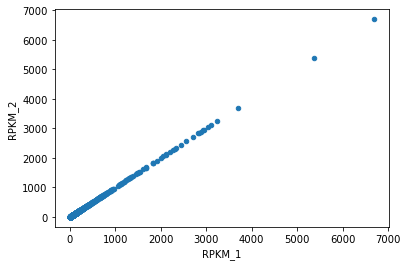

In [4]:
# Visualization to check the linearity of replicates 
hek_df.plot.scatter('RPKM_1', 'RPKM_2')

#Since they're linearly correlated use average instead. 
hek_df['RPKM'] = (hek_df['RPKM_1'] + hek_df['RPKM_2']) / 2

In [18]:
plot_genes = ['GAPDH', 'ACTB', 'ADORA2B', 'RTP1', 'CLGN', 'CANX', 'CALR', 'GFY', 'SYT1', 'SYT9', 'SYT10']
# plot_genes = [ 'RTP1', 'CLGN', 'GFY', 'SYT1']

plot_df = hek_df[hek_df.gene_symbol.isin(plot_genes)]

plot_df['log_RPKM'] = np.log10(plot_df['RPKM'])

cmap = cf.distinct_colors(plot_df.gene_symbol.unique(), category='pastel')

fig = go.Figure()
for _gene in plot_genes: 
   if len(plot_df[plot_df.gene_symbol == _gene]) >= 1: 
      # Bar plot
      subset = plot_df[plot_df['gene_symbol'] == _gene]
      fig.add_trace(go.Bar(x = [_gene], 
                           y = subset['RPKM'].values, 
                           marker_color = cmap[_gene],
                           text = np.round(subset['RPKM'].values, 2),
                           # textangle = 45, 
                           textposition = 'outside',
                           # marker_line = dict(width = 5, color ='black'),
                           opacity = 0.7, 
                           showlegend=False
                           ))
      
      
# fig.add_hline(y=1, line_width=3, line_dash="dash", line_color="Red", opacity = 0.2)
fig.update_layout(template='simple_white', 
                  yaxis_title = 'RPKM', 
                  width = 500, 
                  font=dict(size=10)
                  )
fig.show()
fig.write_html('../output/fig_image/Hek293/Hek293_bar_RPKM.html')

/data/jlu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_2653096/353979461.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

